<a href="https://colab.research.google.com/github/Kaibalya27/Dog-vs-Cat-classification/blob/main/Dog_vs_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:14<00:00, 122MB/s]
100% 1.06G/1.06G [00:14<00:00, 76.3MB/s]


In [4]:
# prompt: unzip with zipfile by importing zipfile

import zipfile
with zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')


In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
def normal(x,y):
    x = tf.cast(x/255. , tf.float32)
    return x,y

In [7]:
train_ds = train_ds.map(normal)
validation_ds = validation_ds.map(normal)

In [10]:
CNN=Sequential()
CNN.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
CNN.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
CNN.add(BatchNormalization())

CNN.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
CNN.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
CNN.add(BatchNormalization())

CNN.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
CNN.add(BatchNormalization())

CNN.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
CNN.add(BatchNormalization())

CNN.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
CNN.add(BatchNormalization())

CNN.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
CNN.add(BatchNormalization())

CNN.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
CNN.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
CNN.add(BatchNormalization())


CNN.add(Flatten())

CNN.add(Dense(128,activation='relu'))
CNN.add(Dropout(0.2))
CNN.add(BatchNormalization())

CNN.add(Dense(64,activation='relu'))
CNN.add(Dropout(0.2))
CNN.add(BatchNormalization())

CNN.add(Dense(1,activation='sigmoid'))

In [9]:
CNN.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
CNN.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 69s 88ms/step - loss: 0.6103 - accuracy: 0.6737 - val_loss: 0.5504 - val_accuracy: 0.7096
Epoch 2/10
625/625 [==============================] - 56s 89ms/step - loss: 0.4700 - accuracy: 0.7786 - val_loss: 0.5161 - val_accuracy: 0.7440
Epoch 3/10
625/625 [==============================] - 55s 88ms/step - loss: 0.3880 - accuracy: 0.8253 - val_loss: 0.3809 - val_accuracy: 0.8274
Epoch 4/10
625/625 [==============================] - 55s 87ms/step - loss: 0.3138 - accuracy: 0.8648 - val_loss: 0.3727 - val_accuracy: 0.8372
Epoch 5/10
625/625 [==============================] - 52s 83ms/step - loss: 0.2526 - accuracy: 0.8958 - val_loss: 0.4255 - val_accuracy: 0.8258
Epoch 6/10
625/625 [==============================] - 52s 83ms/step - loss: 0.2046 - accuracy: 0.9165 - val_loss: 0.4920 - val_accuracy: 0.7884
Epoch 7/10
625/625 [==============================] - 52s 83ms/step - loss: 0.1733 - accuracy: 0.9315 - val_loss: 0.6609 - val_accuracy:

In [9]:
from google.colab import drive
drive.mount('/content/drive')

# Save a model
CNN.save('/content/drive/MyDrive/model.h5')

# Load a model
from tensorflow.keras.models import load_model
CNN = load_model('/content/drive/MyDrive/model.h5')

Mounted at /content/drive


In [10]:
CNN

In [10]:
import cv2

In [34]:
test_img = cv2.imread('/content/test/cats/cat.10036.jpg')

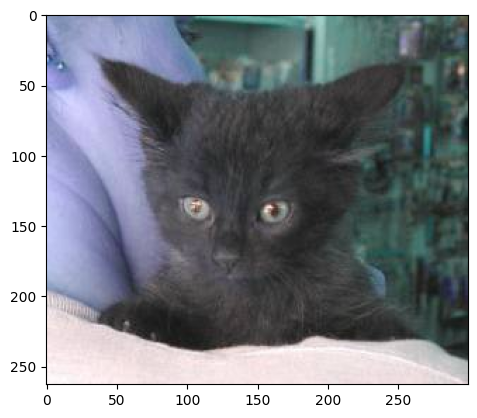

In [35]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [36]:
test_img.shape

(263, 300, 3)

In [37]:
test_img = cv2.resize(test_img,(256,256))

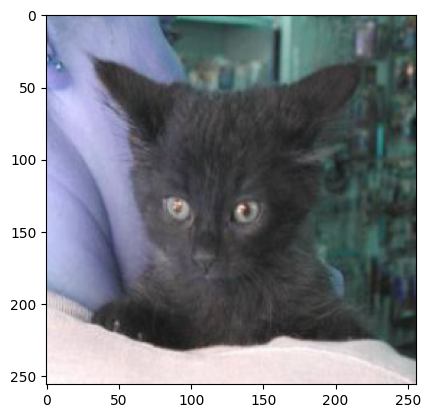

In [38]:
plt.imshow(test_img)

In [39]:
test_input = test_img.reshape((1,256,256,3))

In [40]:
CNN.predict(test_input)

1/1 [==============================] - 0s 46ms/step


array([[0.]], dtype=float32)

In [21]:
test_img = cv2.imread('/content/test/dogs/dog.10006.jpg')

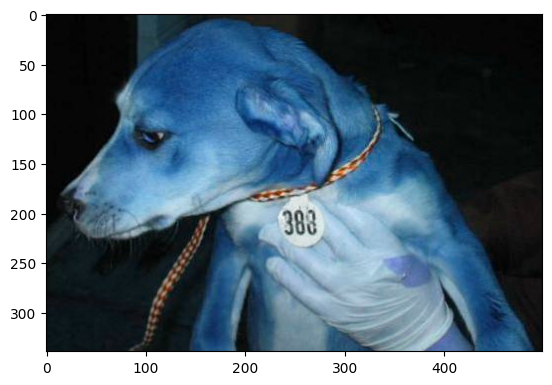

In [22]:
plt.imshow(test_img)

In [24]:
test_img = cv2.resize(test_img,(256,256))

In [25]:
test_input = test_img.reshape((1,256,256,3))

In [26]:
CNN.predict(test_input)

1/1 [==============================] - 0s 125ms/step


array([[1.]], dtype=float32)

# Data Augmentation

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)
test_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [9]:
def cnn():
  CNN=Sequential()
  CNN.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
  CNN.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
  CNN.add(BatchNormalization())

  CNN.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
  CNN.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
  CNN.add(BatchNormalization())

  CNN.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
  CNN.add(BatchNormalization())

  CNN.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
  CNN.add(BatchNormalization())

  CNN.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
  CNN.add(BatchNormalization())

  CNN.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
  CNN.add(BatchNormalization())

  CNN.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
  CNN.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
  CNN.add(BatchNormalization())


  CNN.add(Flatten())

  CNN.add(Dense(128,activation='relu'))
  CNN.add(Dropout(0.2))
  CNN.add(BatchNormalization())

  CNN.add(Dense(64,activation='relu'))
  CNN.add(Dropout(0.2))
  CNN.add(BatchNormalization())

  CNN.add(Dense(1,activation='sigmoid'))
  CNN.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return CNN

In [10]:
CNN1=cnn()

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=2,
    verbose=1,
    mode="auto",
    restore_best_weights=True
)

In [13]:
CNN1.fit_generator(train_generator,epochs=10,validation_data=test_generator,callbacks=[callback])

<ipython-input-13-c463278309bb>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  CNN1.fit_generator(train_generator,epochs=10,validation_data=test_generator,callbacks=[callback])


Epoch 1/10
625/625 [==============================] - 331s 509ms/step - loss: 0.5997 - accuracy: 0.6830 - val_loss: 0.5304 - val_accuracy: 0.7402
Epoch 2/10
625/625 [==============================] - 319s 511ms/step - loss: 0.4849 - accuracy: 0.7688 - val_loss: 0.5854 - val_accuracy: 0.7186
Epoch 3/10
625/625 [==============================] - 318s 509ms/step - loss: 0.4195 - accuracy: 0.8084 - val_loss: 0.5235 - val_accuracy: 0.7420
Epoch 4/10
625/625 [==============================] - 315s 504ms/step - loss: 0.3653 - accuracy: 0.8425 - val_loss: 0.4067 - val_accuracy: 0.8242
Epoch 5/10
625/625 [==============================] - 316s 505ms/step - loss: 0.3134 - accuracy: 0.8648 - val_loss: 0.3043 - val_accuracy: 0.8716
Epoch 6/10
625/625 [==============================] - 319s 511ms/step - loss: 0.2770 - accuracy: 0.8839 - val_loss: 0.2983 - val_accuracy: 0.8706
Epoch 7/10
625/625 [==============================] - 317s 506ms/step - loss: 0.2491 - accuracy: 0.8970 - val_loss: 0.2694 -

In [8]:
from google.colab import drive
drive.mount('/content/drive')

# Save a model
CNN1.save('/content/drive/MyDrive/model1.h5')

# Load a model
from tensorflow.keras.models import load_model
CNN1 = load_model('/content/drive/MyDrive/model1.h5')

Mounted at /content/drive


In [35]:
test_img = cv2.imread('/content/test/cats/cat.10000.jpg')

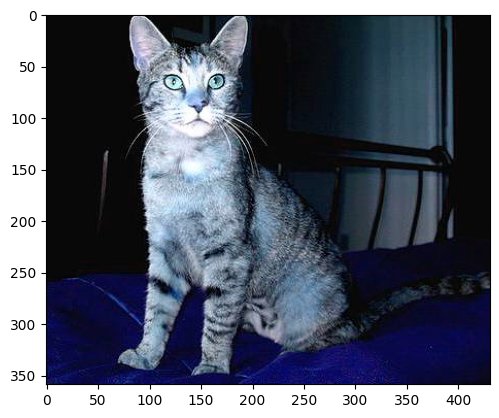

In [36]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [44]:
test_img = cv2.resize(test_img,(256,256))
test_img=test_img/255

In [43]:
test_input = test_img.reshape((1,256,256,3))
(CNN1.predict(test_input)>0.5).astype(int)

1/1 [==============================] - 0s 100ms/step


array([[0]])

In [45]:
test_img = cv2.imread('/content/test/dogs/dog.10014.jpg')

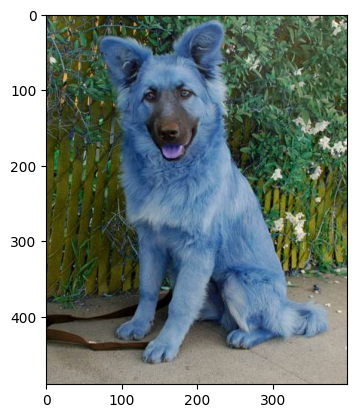

In [46]:
plt.imshow(test_img)

In [47]:
test_img = cv2.resize(test_img,(256,256))
test_img=test_img/255

In [48]:
test_input = test_img.reshape((1,256,256,3))
(CNN1.predict(test_input)>0.5).astype(int)

1/1 [==============================] - 0s 102ms/step


array([[1]])

# Transfer Learning

In [11]:
from tensorflow.keras.applications.vgg16 import VGG16
cb=VGG16(weights='imagenet',include_top=False,input_shape=(256,256,3))

58889256/58889256 [==============================] - 0s 0us/step


In [12]:
cb.trainable=True
for layer in cb.layers:
  if 'block5' in layer.name:
    layer.trainable=True
  else:
    layer.trainable=False
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [14]:
CNN2=Sequential()
CNN2.add(cb)
CNN2.add(Flatten())

CNN2.add(Dense(128,activation='relu'))
CNN2.add(Dropout(0.2))
CNN2.add(BatchNormalization())

CNN2.add(Dense(64,activation='relu'))
CNN2.add(Dropout(0.2))
CNN2.add(BatchNormalization())

CNN2.add(Dense(1,activation='sigmoid'))
CNN2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=5,
    verbose=1,
    mode="auto",
    restore_best_weights=True
)

In [15]:
CNN2.fit_generator(train_generator,epochs=10,validation_data=test_generator,callbacks=[callback])

<ipython-input-15-5207012b3926>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  CNN2.fit_generator(train_generator,epochs=10,validation_data=test_generator,callbacks=[callback])


Epoch 1/10
625/625 [==============================] - 382s 583ms/step - loss: 0.2562 - accuracy: 0.8905 - val_loss: 2.0512 - val_accuracy: 0.7478
Epoch 2/10
625/625 [==============================] - 360s 576ms/step - loss: 0.1579 - accuracy: 0.9391 - val_loss: 0.0943 - val_accuracy: 0.9620
Epoch 3/10
625/625 [==============================] - 361s 577ms/step - loss: 0.1475 - accuracy: 0.9420 - val_loss: 0.0860 - val_accuracy: 0.9656
Epoch 4/10
625/625 [==============================] - 361s 578ms/step - loss: 0.1168 - accuracy: 0.9548 - val_loss: 0.0785 - val_accuracy: 0.9710
Epoch 5/10
625/625 [==============================] - 360s 576ms/step - loss: 0.1048 - accuracy: 0.9602 - val_loss: 0.1039 - val_accuracy: 0.9610
Epoch 6/10
625/625 [==============================] - 361s 577ms/step - loss: 0.0932 - accuracy: 0.9662 - val_loss: 0.0826 - val_accuracy: 0.9672
Epoch 7/10
625/625 [==============================] - 359s 574ms/step - loss: 0.0795 - accuracy: 0.9703 - val_loss: 0.0671 -

In [16]:
from google.colab import drive
drive.mount('/content/drive')

# Save a model
CNN2.save('/content/drive/MyDrive/model2.h5')

# Load a model
from tensorflow.keras.models import load_model
CNN2 = load_model('/content/drive/MyDrive/model2.h5')

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


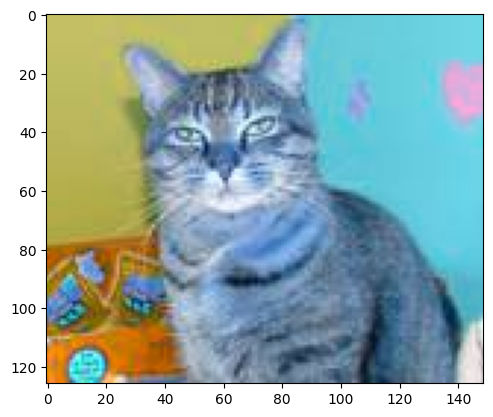

In [19]:
import cv2
import matplotlib.pyplot as plt
test_img= cv2.imread('/content/test/cats/cat.10526.jpg')
plt.imshow(test_img)

In [24]:
test_img=cv2.resize(test_img,(256,256))
test_img=test_img/255
test_input=test_img.reshape((1,256,256,3))
(CNN2.predict(test_input)>0.5).astype(int)

1/1 [==============================] - 0s 52ms/step


array([[0]])

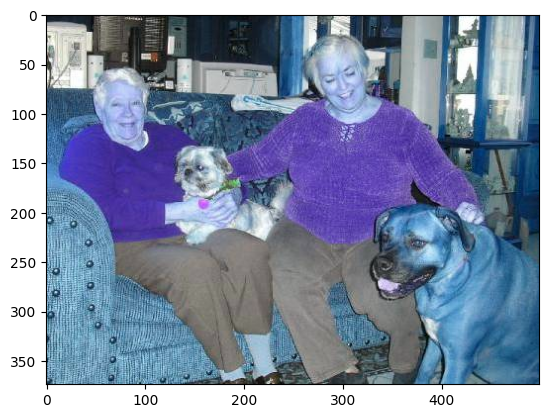

In [25]:
test_img= cv2.imread('/content/test/dogs/dog.1642.jpg')
plt.imshow(test_img)

In [26]:
test_img=cv2.resize(test_img,(256,256))
test_img=test_img/255
test_input=test_img.reshape((1,256,256,3))
(CNN2.predict(test_input)>0.5).astype(int)

1/1 [==============================] - 0s 28ms/step


array([[1]])